In [1]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [2]:
# Load in the dataset
dataset,info = tfds.load("cifar10", with_info=True, as_supervised=True)

train_data_original = dataset["train"]
test_data = dataset["test"]

# Get total train examples
train_size = info.splits["train"].num_examples

# Define split sizes (80% train, 20% validation)
val_size = int(0.2 * train_size)
train_size_final = train_size - val_size

# Shuffle the data before splitting
train_data_original = train_data_original.shuffle(train_size, seed=42)

# Split train data
train_data_raw = train_data_original.take(train_size_final).cache()
val_data_raw = train_data_original.skip(train_size_final).take(val_size).cache()
test_data_raw = test_data.cache()

print(f"Train data size: {len(train_data_raw)}")
print(f"Validation data size: {len(val_data_raw)}")
print(f"Test data size: {len(test_data_raw)}")

class_names = info.features["label"].names
print(f"Class names: {class_names}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.6X9TOH_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.6X9TOH_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Train data size: 40000
Validation data size: 10000
Test data size: 10000
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
def check_image(data):
  for image, label in data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label}")

In [4]:
print("Train data:")
check_image(train_data_raw)
print("Validation data:")
check_image(val_data_raw)
print("Test data:")
check_image(test_data_raw)

Train data:
Image shape: (32, 32, 3)
Label: 2
Validation data:
Image shape: (32, 32, 3)
Label: 0
Test data:
Image shape: (32, 32, 3)
Label: 7


In [5]:
# Visualize random image from train,validation and test datasets

import matplotlib.pyplot as plt
import random
import numpy as np

def plot_random_image(data, class_names):
  shuffled_data = data.shuffle(50000)

  for image, label in shuffled_data.take(1):
    label_index = label.numpy()
    label = class_names[label_index]
    plt.imshow(image)
    plt.title(label)
    print(f"Image shape: {image.shape}")
    plt.axis(False)
    plt.show()

    return image


Image shape: (32, 32, 3)


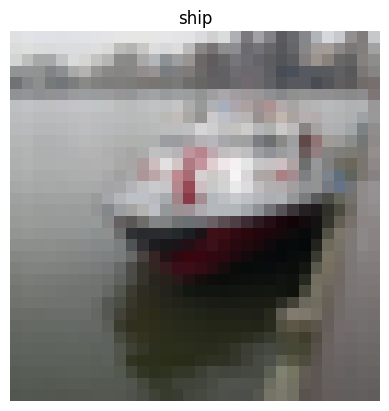

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[224, 224, 227],
        [225, 227, 230],
        [222, 225, 229],
        ...,
        [146, 143, 144],
        [127, 125, 124],
        [198, 200, 202]],

       [[218, 220, 219],
        [221, 223, 222],
        [218, 220, 220],
        ...,
        [123, 119, 119],
        [129, 126, 124],
        [161, 163, 162]],

       [[210, 213, 210],
        [190, 191, 189],
        [168, 168, 168],
        ...,
        [ 99,  98,  98],
        [132, 129, 126],
        [141, 141, 139]],

       ...,

       [[ 87,  92,  85],
        [ 88,  93,  86],
        [ 88,  93,  86],
        ...,
        [102,  97,  97],
        [104, 100,  99],
        [103,  99,  98]],

       [[ 85,  90,  83],
        [ 86,  91,  84],
        [ 85,  90,  83],
        ...,
        [100,  96,  95],
        [101,  97,  96],
        [101,  96,  96]],

       [[ 82,  87,  80],
        [ 83,  88,  81],
        [ 82,  87,  80],
        ...,
        [ 98,  94,  93]

In [6]:
# Random image from training data
train_image = plot_random_image(train_data_raw, class_names)
train_image

Image shape: (32, 32, 3)


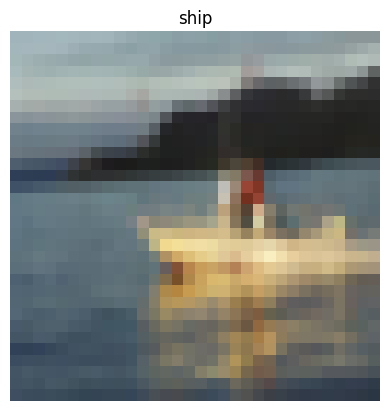

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[161, 179, 187],
        [161, 180, 187],
        [162, 182, 189],
        ...,
        [139, 150, 153],
        [139, 150, 152],
        [139, 150, 152]],

       [[163, 182, 187],
        [165, 183, 188],
        [166, 183, 188],
        ...,
        [150, 162, 161],
        [157, 169, 168],
        [165, 177, 175]],

       [[163, 182, 184],
        [161, 178, 180],
        [157, 174, 176],
        ...,
        [175, 188, 182],
        [179, 191, 186],
        [175, 186, 183]],

       ...,

       [[ 67,  84, 100],
        [ 71,  89, 103],
        [ 68,  86, 100],
        ...,
        [ 83,  88,  93],
        [ 80,  85,  90],
        [ 72,  80,  88]],

       [[ 66,  84, 100],
        [ 67,  85,  99],
        [ 64,  82,  96],
        ...,
        [ 52,  62,  79],
        [ 52,  61,  77],
        [ 48,  59,  73]],

       [[ 63,  79,  97],
        [ 59,  76,  92],
        [ 58,  76,  91],
        ...,
        [ 47,  57,  71]

In [7]:
# Random image from test data
test_image = plot_random_image(test_data_raw, class_names)
test_image

Image shape: (32, 32, 3)


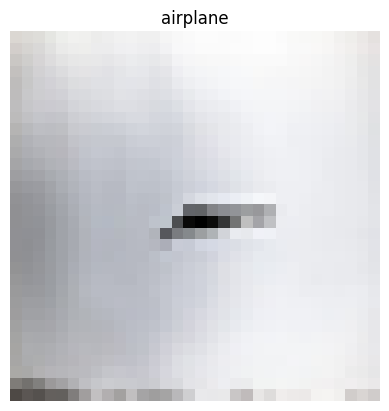

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[219, 215, 210],
        [220, 218, 214],
        [222, 221, 217],
        ...,
        [239, 238, 235],
        [235, 232, 230],
        [229, 225, 223]],

       [[211, 206, 203],
        [214, 212, 209],
        [217, 216, 215],
        ...,
        [241, 239, 237],
        [237, 233, 232],
        [232, 227, 227]],

       [[202, 199, 196],
        [207, 206, 204],
        [214, 212, 213],
        ...,
        [238, 238, 237],
        [232, 231, 230],
        [228, 226, 226]],

       ...,

       [[170, 169, 166],
        [169, 169, 168],
        [178, 177, 178],
        ...,
        [236, 236, 236],
        [234, 234, 234],
        [230, 230, 231]],

       [[127, 124, 120],
        [115, 113, 110],
        [129, 128, 126],
        ...,
        [240, 238, 239],
        [237, 236, 236],
        [234, 232, 233]],

       [[ 78,  73,  69],
        [ 91,  86,  83],
        [ 85,  81,  78],
        ...,
        [209, 205, 203]

In [8]:
# Random image from validation data
val_image = plot_random_image(val_data_raw, class_names)
val_image

In [9]:
# Define a preprocessing function to rescale images
NUM_CLASSES = info.features["label"].num_classes

def preprocess_image(image, label):
  image = tf.cast(image, tf.float32)/255.0
  label = tf.one_hot(label, depth=NUM_CLASSES)
  return image, label

In [10]:
BATCH_SIZE = 32

# Set the seed
tf.random.set_seed(42)

# Process the training data
train_data = train_data_raw.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE) \
                                      .shuffle(buffer_size=50000, seed=42) \
                                      .batch(BATCH_SIZE) \
                                      .prefetch(tf.data.AUTOTUNE)

# Process the validation data
val_data = val_data_raw.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE) \
                                     .batch(BATCH_SIZE) \
                                     .prefetch(tf.data.AUTOTUNE)
# Process the test data
test_data = test_data_raw.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE) \
                                     .batch(BATCH_SIZE) \
                                     .prefetch(tf.data.AUTOTUNE)

print("Preprocessed train data:", train_data)
print("Preprocessed validation data:", val_data)
print("Preprocessed test data:", test_data)

Preprocessed train data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
Preprocessed validation data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
Preprocessed test data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [11]:
len(train_data), len(val_data), len(test_data)

(1250, 313, 313)

In [12]:
def min_max(data):
  for image, label in data.take(1):
    print(f"dtype: {image.dtype}")
    print(f"min-value: {tf.reduce_min(image)}")
    print(f"max-value: {tf.reduce_max(image)}")

In [13]:
print("Train data:")
min_max(train_data)
print("Validation data:")
min_max(val_data)
print("Test data:")
min_max(test_data)

Train data:
dtype: <dtype: 'float32'>
min-value: 0.0
max-value: 1.0
Validation data:
dtype: <dtype: 'float32'>
min-value: 0.0
max-value: 1.0
Test data:
dtype: <dtype: 'float32'>
min-value: 0.0
max-value: 1.0


### CNN model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create the model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(64, (3,3), activation="relu"),
    Conv2D(64, (3,3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(train_data,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3524 - loss: 1.7501 - val_accuracy: 0.5714 - val_loss: 1.1858
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5945 - loss: 1.1426 - val_accuracy: 0.6756 - val_loss: 0.9152
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6814 - loss: 0.9040 - val_accuracy: 0.7312 - val_loss: 0.7516
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7265 - loss: 0.7815 - val_accuracy: 0.7516 - val_loss: 0.7099
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7675 - loss: 0.6663 - val_accuracy: 0.7920 - val_loss: 0.5993
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8002 - loss: 0.5693 - val_accuracy: 0.8047 - val_loss: 0.5618
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8193 - loss: 0.5108 - val_accuracy: 0.8190 - val_loss: 0.5264
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8408 - loss: 0.4423 -

In [16]:
# Plot validation and training curves seaprately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

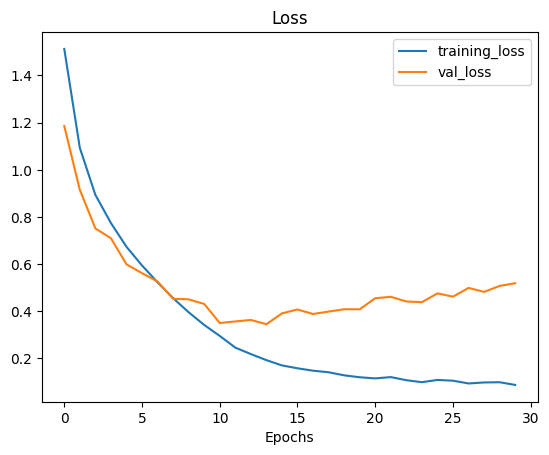

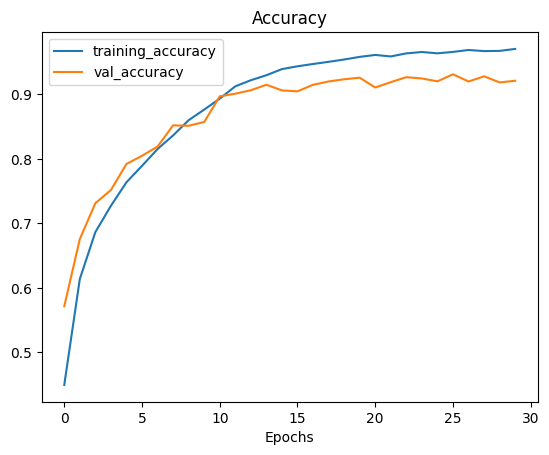

In [17]:
plot_loss_curves(history)

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6960 - loss: 2.3132
Test accuracy: 0.6994


### Data Augmentation

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)

])

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-5
)


In [21]:
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D

model_aug = Sequential([
    data_augmentation,
    Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPool2D((2,2)),
    BatchNormalization(),
    Dropout(0.3),
    GlobalAveragePooling2D(),

    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

# Compile the model
model_aug.compile(
              loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history_aug = model_aug.fit(train_data,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.2403 - loss: 2.4546 - val_accuracy: 0.3650 - val_loss: 1.7860 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.3795 - loss: 1.7562 - val_accuracy: 0.4853 - val_loss: 1.4290 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.4394 - loss: 1.5796 - val_accuracy: 0.4811 - val_loss: 1.5135 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.4781 - loss: 1.4563 - val_accuracy: 0.5706 - val_loss: 1.2012 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.5235 - loss: 1.3443 - val_accuracy: 0.5299 - val_loss: 1.3905 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.5445 - loss: 1.2812 - val_accuracy: 0.6250 - val_loss: 1.0763 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accura

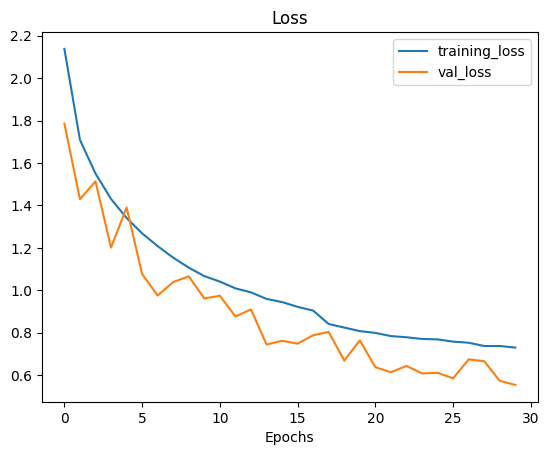

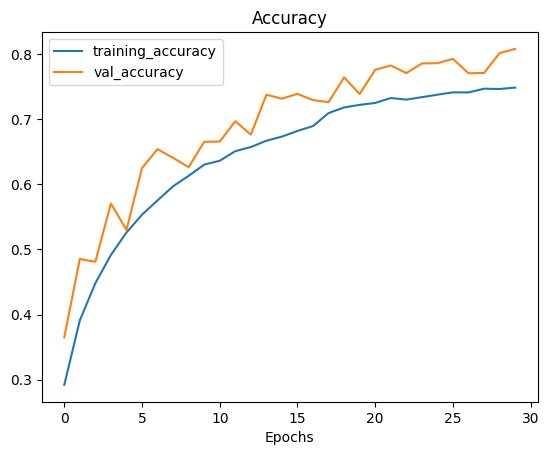

In [23]:
plot_loss_curves(history_aug)

In [24]:
# Evaluate the model
test_loss, test_acc = model_aug.evaluate(test_data)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7789 - loss: 0.6406
Test accuracy: 0.7763


### Save the model

In [25]:
# Save the entire model
model_aug.save("model_aug.h5")

### Testing the model

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your saved model
model = tf.keras.models.load_model("model_aug.h5")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess single image (32x32x3 required)
def predict_image(model,img_path):
  # Load image
  img = image.load_img(img_path, target_size=(32, 32))
  plt.imshow(img)
  plt.title(f"Input: {img_path}")
  plt.axis("off")
  plt.show()

  # Preprocess the image
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_image(img_array)

  # Predict
  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction)[0]]
  confidence = np.max(prediction) * 100
  print(f"Predicted class: {predicted_class}")
  print(f"Confidence: {confidence:.2f}%")

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# CIFAR-10 class names (assuming these are available globally, re-defining for clarity in this cell)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Redefine predict_image with the corrected preprocessing
def predict_image(model,img_path):
  # Load image
  img = image.load_img(img_path, target_size=(32, 32))
  plt.imshow(img)
  plt.title(f"Input: {img_path}")
  plt.axis("off")
  plt.show()

  # Preprocess the image: convert to array, add batch dimension, and rescale
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = tf.cast(img_array, tf.float32)/255.0 # Corrected preprocessing

  # Predict
  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction)] # Corrected index extraction
  confidence = np.max(prediction) * 100
  print(f"Predicted class: {predicted_class}")
  print(f"Confidence: {confidence:.2f}%")



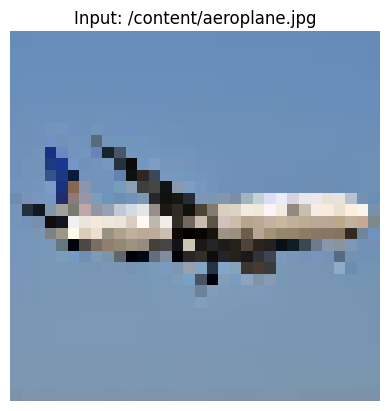

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
Predicted class: airplane
Confidence: 99.59%


In [29]:
predict_image(model,"/content/aeroplane.jpg")

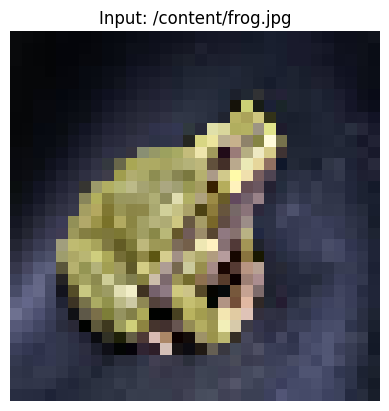

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: frog
Confidence: 99.87%


In [30]:
predict_image(model,"/content/frog.jpg")

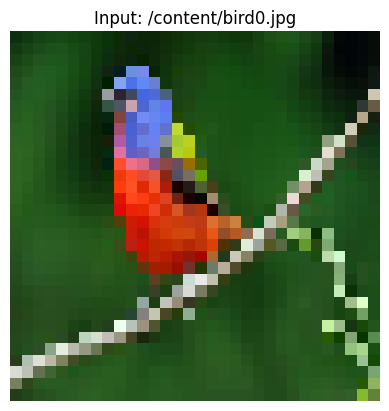

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: airplane
Confidence: 78.45%


In [31]:
predict_image(model,"/content/bird0.jpg")

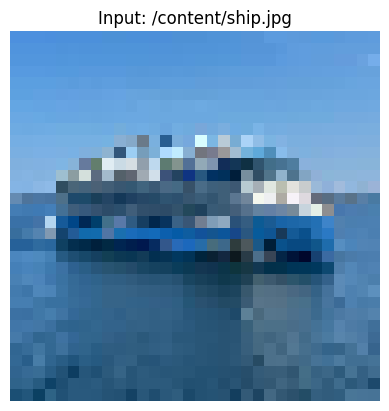

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: ship
Confidence: 99.93%


In [32]:
predict_image(model,"/content/ship.jpg")

## Transfer Learning

### MobileNetV2

In [33]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# PHASE 1: Build + Freeze Base (Train Head Only)
base_model = MobileNetV2(
    input_shape=(32, 32, 3),
    alpha=1.0,  # Full MobileNetV2
    include_top=False,
    weights='imagenet',  # ✅ Pretrained weights
    pooling=None
)

# Freeze base (3.5M params frozen)
base_model.trainable = False

# Add your classifier (same as before)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Compile Phase 1 (higher LR for head)
model_mobilenet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),  # Higher LR
    metrics=["accuracy"]
)

print("Phase 1: Training head only...")
history_mobilenet_phase1 = model_mobilenet.fit(
    train_data, epochs=10,  # Fewer epochs
    validation_data=val_data,
    callbacks=[early_stop, reduce_lr]
)

# PHASE 2: Fine-tune entire model
base_model.trainable = True  # ✅ Unfreeze all layers

# Lower LR for fine-tuning (protect pretrained weights)
model_mobilenet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),  # 10x lower LR
    metrics=["accuracy"]
)

/tmp/ipython-input-3674005191.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Phase 1: Training head only...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.2400 - loss: 2.2825 - val_accuracy: 0.3405 - val_loss: 1.8115 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3023 - loss: 1.9078 - val_accuracy: 0.3523 - val_loss: 1.7822 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.3257 - loss: 1.8572 - val_accuracy: 0.3660 - val_loss: 1.7427 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3246 - loss: 1.8509 - val_accuracy: 0.3740 - val_loss: 1.7337 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3381 - loss: 1.8275 - val_accuracy: 0.3744 - val_loss: 1.7312 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3397 - loss: 1.8144 - val_accuracy: 0.3790 - val_loss: 1.7108 - learning_ra

In [34]:
print("Phase 2: Fine-tuning entire model...")
history_mobilenet_phase2 = model_mobilenet.fit(
    train_data, epochs=20,
    validation_data=val_data,
    callbacks=[early_stop, reduce_lr]
)


Phase 2: Fine-tuning entire model...
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.2393 - loss: 2.6611 - val_accuracy: 0.2133 - val_loss: 2.1806 - learning_rate: 1.0000e-04
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.4402 - loss: 1.6458 - val_accuracy: 0.5064 - val_loss: 1.5345 - learning_rate: 1.0000e-04
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5247 - loss: 1.3788 - val_accuracy: 0.6244 - val_loss: 1.1178 - learning_rate: 1.0000e-04
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5828 - loss: 1.1907 - val_accuracy: 0.6837 - val_loss: 0.9124 - learning_rate: 1.0000e-04
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6444 - loss: 1.0306 - val_accuracy: 0.7198 - val_loss: 0.8010 - learning_rate: 1.0000e-04
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6830 - loss: 0.9250 - val_accuracy: 0.7520 - val_loss: 0.7169 - learning_rate: 1.0000e-04
Epo

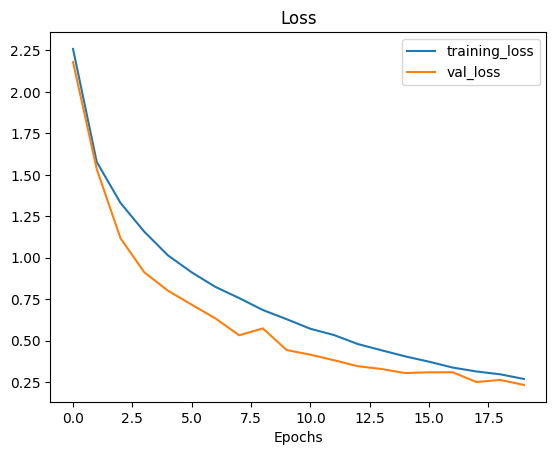

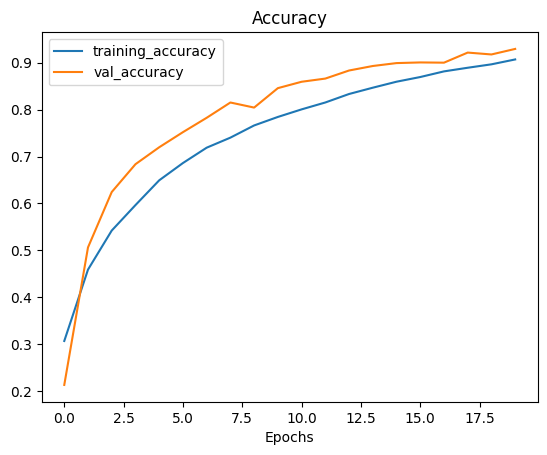

In [35]:
plot_loss_curves(history_mobilenet_phase2)

In [36]:
# Test
test_loss, test_acc = model_mobilenet.evaluate(test_data)
print(f"MobileNetV2 Final Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8012 - loss: 0.6938
MobileNetV2 Final Test Accuracy: 0.7936


In [37]:
model_mobilenet.save("model_mobilenet.h5")

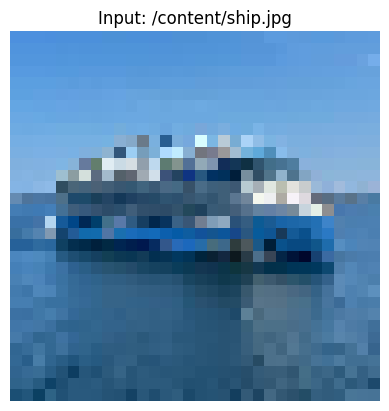

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted class: ship
Confidence: 90.97%


In [38]:
predict_image(model_mobilenet,"/content/ship.jpg")

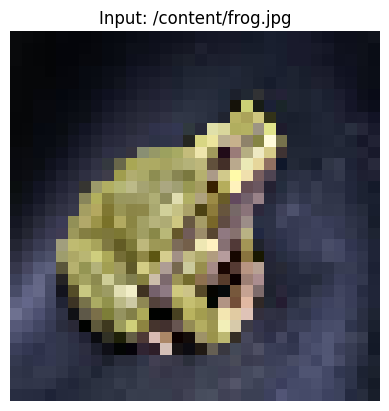

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: frog
Confidence: 47.29%


In [39]:
predict_image(model_mobilenet,"/content/frog.jpg")

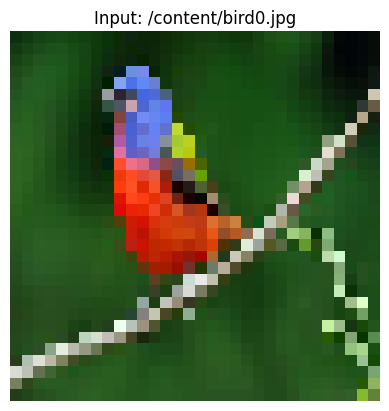

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: airplane
Confidence: 66.04%


In [40]:
predict_image(model_mobilenet,"/content/bird0.jpg")

### EfficientNetB0

In [41]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Building EfficientNetB0 for CIFAR-10...")

# PHASE 1: Load pretrained EfficientNetB0 + Freeze
base_model = EfficientNetB0(
    input_shape=(32, 32, 3),        # CIFAR-10 size
    include_top=False,              # Remove ImageNet head
    weights='imagenet'             # Pretrained weights
)

base_model.trainable = False       # Freeze base model

x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

model_efficientnet = Model(inputs=base_model.input, outputs=predictions)

# Compile Phase 1 (high LR for head)
model_efficientnet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),  # Higher LR
    metrics=["accuracy"]
)

print("Phase 1: Training head only...")
history_efficientnet_phase1 = model_efficientnet.fit(
    train_data, epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stop, reduce_lr]
)

Building EfficientNetB0 for CIFAR-10...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Phase 1: Training head only...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.1004 - loss: 2.6083 - val_accuracy: 0.1033 - val_loss: 2.3047 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1084 - loss: 2.3411 - val_accuracy: 0.1016 - val_loss: 2.3103 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1077 - loss: 2.3295 - val_accuracy: 0.1079 - val_loss: 2.2970 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1105 - loss: 2.3197 - val_accuracy: 0.1009 - val_loss: 2.2959 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1145 - loss: 2.3117 - val_accuracy: 0.0988 - val_loss: 2.2949 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1196 - loss: 2.3024 - val_accurac

In [42]:
# Phase 2: Fine-tune entire model
base_model.trainable = True  # Unfreeze all

# Lower LR for fine-tuning
model_efficientnet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),  # 10x lower LR
    metrics=["accuracy"]
)

print("Phase 2: Fine-tuning entire EfficientNetB0...")
history_efficientnet_phase2 = model_efficientnet.fit(
    train_data, epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stop, reduce_lr]
)

Phase 2: Fine-tuning entire EfficientNetB0...
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 28ms/step - accuracy: 0.2212 - loss: 2.3001 - val_accuracy: 0.1998 - val_loss: 2.4812 - learning_rate: 1.0000e-04
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.4465 - loss: 1.5736 - val_accuracy: 0.2330 - val_loss: 2.1694 - learning_rate: 1.0000e-04
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5376 - loss: 1.3244 - val_accuracy: 0.2228 - val_loss: 2.4776 - learning_rate: 1.0000e-04
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.5961 - loss: 1.1507 - val_accuracy: 0.1792 - val_loss: 2.7467 - learning_rate: 1.0000e-04
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.6452 - loss: 1.0131 - val_accuracy: 0.1884 - val_loss: 2.4549 - learning_rate: 1.0000e-04
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6817 - loss: 0.9120 - val_accuracy: 0.5297 - val_loss: 1.4164 - learning_rate: 5.00

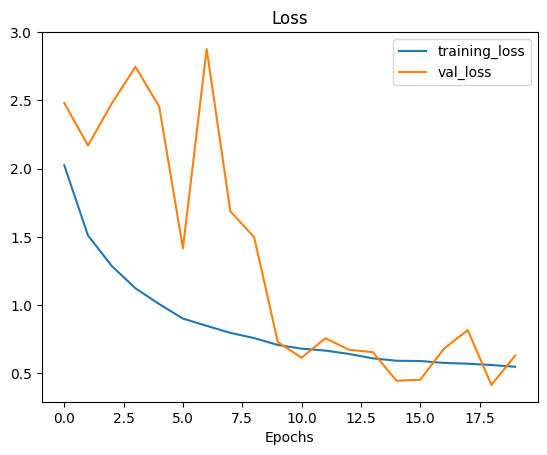

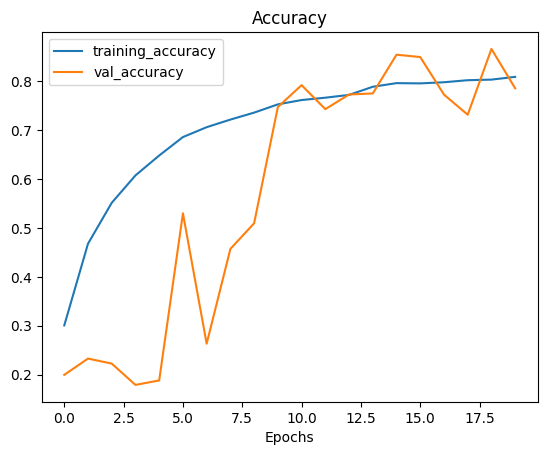

In [43]:
plot_loss_curves(history_efficientnet_phase2)

In [44]:
# Final test
test_loss, test_acc = model_efficientnet.evaluate(test_data)
print(f"EfficientNetB0 Final Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7389 - loss: 0.7893
EfficientNetB0 Final Test Accuracy: 0.7344


In [45]:
# Save the model
model_efficientnet.save("model_efficientnet.h5")

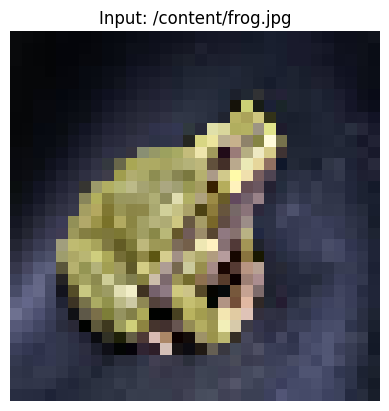

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted class: frog
Confidence: 47.51%


In [47]:
predict_image(model_efficientnet,"/content/frog.jpg")

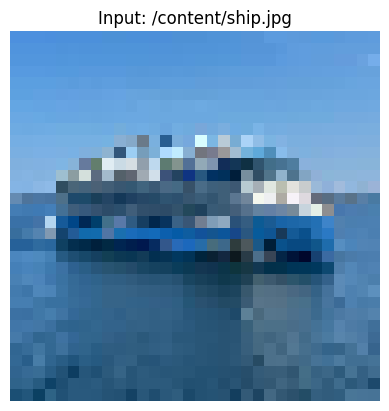

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: airplane
Confidence: 85.83%


In [48]:
# test the model
predict_image(model_efficientnet,"/content/ship.jpg")

### VGG16

In [49]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("Building VGG16 for CIFAR-10...")

# PHASE 1: Load pretrained VGG16 + Freeze
base_model = VGG16(
    input_shape=(32, 32, 3),        # CIFAR-10 size
    include_top=False,              # Remove ImageNet head
    weights='imagenet',             # Pretrained weights
    pooling=None
)

base_model.trainable = False      # Freeze base (Phase 1)

# YOUR classifier head (same as before)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation="softmax")(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile Phase 1
model_vgg16.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Phase 1: Training VGG16 head only...")
history_vgg16_phase1 = model_vgg16.fit(
    train_data, epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stop, reduce_lr]
)



Building VGG16 for CIFAR-10...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Phase 1: Training VGG16 head only...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4267 - loss: 1.7273 - val_accuracy: 0.5583 - val_loss: 1.2538 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5390 - loss: 1.3216 - val_accuracy: 0.5765 - val_loss: 1.1984 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5553 - loss: 1.2802 - val_accuracy: 0.5931 - val_loss: 1.1539 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5581 - loss: 1.2687 - val_accuracy: 0.6009 - val_loss: 1.1387 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5711 - loss: 1.2431 - val_accuracy: 0.5971 - val_loss: 1.1364 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5722 - loss: 1.2362 - val_accur

In [50]:
# PHASE 2: Fine-tune entire model
base_model.trainable = True       # 🔓 Unfreeze everything

model_vgg16.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower LR
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Phase 2: Fine-tuning VGG16...")
history_vgg16_phase2 = model_vgg16.fit(
    train_data, epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stop, reduce_lr]
)

Phase 2: Fine-tuning VGG16...
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.6407 - loss: 1.0505 - val_accuracy: 0.7725 - val_loss: 0.6528 - learning_rate: 1.0000e-04
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.8147 - loss: 0.5476 - val_accuracy: 0.8273 - val_loss: 0.5261 - learning_rate: 1.0000e-04
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.8722 - loss: 0.3748 - val_accuracy: 0.9073 - val_loss: 0.2825 - learning_rate: 1.0000e-04
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 51ms/step - accuracy: 0.9164 - loss: 0.2519 - val_accuracy: 0.9204 - val_loss: 0.2440 - learning_rate: 1.0000e-04
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.9443 - loss: 0.1720 - val_accuracy: 0.9250 - val_loss: 0.2351 - learning_rate: 1.0000e-04
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.9572 - loss: 0.1290 - val_accuracy: 0.9435 - val_loss: 0.1864 - learning_rate: 1.0000e-04
Epoch 7/20

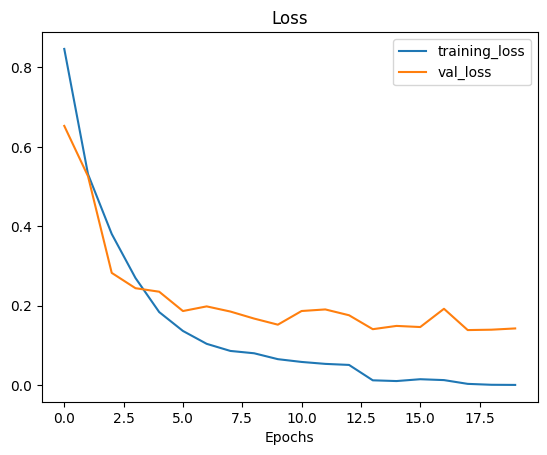

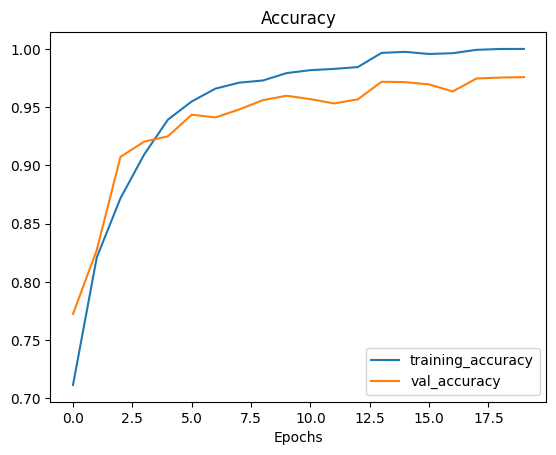

In [51]:
plot_loss_curves(history_vgg16_phase2)

In [52]:

# Final test
test_loss, test_acc = model_vgg16.evaluate(test_data)
print(f"VGG16 Final Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8712 - loss: 0.7283
VGG16 Final Test Accuracy: 0.8695


In [54]:
# Save
model_vgg16.save('model_vgg16.h5')

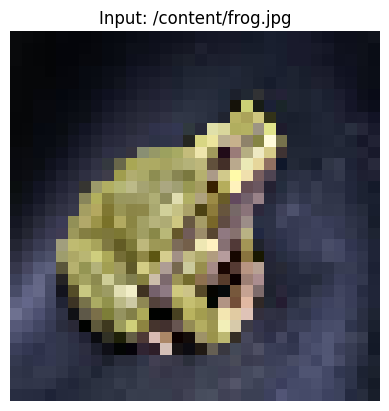

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: frog
Confidence: 100.00%


In [55]:
predict_image(model_vgg16,"/content/frog.jpg")

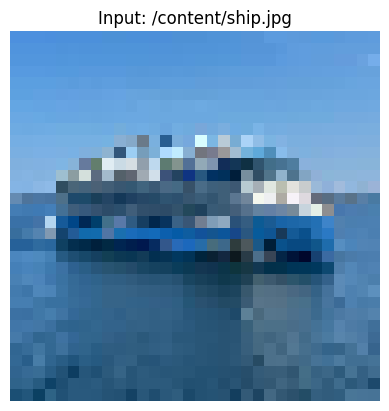

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: ship
Confidence: 100.00%


In [56]:
predict_image(model_vgg16,"/content/ship.jpg")